In [2]:
from keras import applications
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

import matplotlib.pyplot as plt
import numpy as np

import os


In [3]:
# Let's first just see what happens when we run a single gray scale image through VGG
# Hypotheses
#   - It will through an error/break in some overt way
#   - It will not throw an error, and just fucking suck
#
# Before we even do this, so tha we can truly pinpoint both ofthese thoughts, let's pass an OBVIOUS 
# colored image of a vehicle through here, and then do the same image but in grayscale. 
model = VGG16(weights='imagenet', include_top=True)


In [4]:
# Why tf are we doing this through a keras wrapper 
color_img_path = './color_cropped_images/cars/img0_car0.jpg'
color_img = image.load_img(color_img_path, target_size=(224, 224)) 
color_img = image.img_to_array(color_img)

plt.imshow(color_img.astype(np.uint8))
plt.show()

# The default  here for the mode of the preprocess_input method is 'caffe'
# which is actually what we want here because VGG16 was originally implemented in caffe
color_img = np.expand_dims(color_img, axis=0)
color_img = preprocess_input(color_img)

results = model.predict(color_img)

print('prediction: ', imagenet_classes.get(int(np.argmax(results))) )
print('max_position: ', np.argmax(results))
print('max: ', np.max(results))
print('min', np.min(results))



FileNotFoundError: [Errno 2] No such file or directory: './color_cropped_images/cars/img0_car0.jpg'

(224, 224, 3)


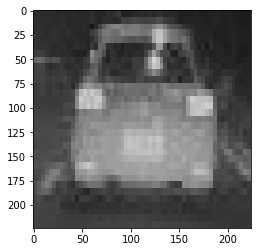

(33, 57)


In [9]:
# So it thinks that that single image is a snowplow, which is wrong, but I think I can understand how
# a neural network could see that as an analagous class
# I am going to give it a whorl onthe same image but in grayscale and see if it even accepts it
#
gray_img_path = './cropped_split_dataset/test/cars/img1_car0.jpg'
img = image.load_img(gray_img_path, target_size=(224, 224))
img = image.img_to_array(img)

print(img.shape)
plt.imshow(img.astype(np.uint8))
plt.show()

# So Here is an interesting revelation:
#    The keras image loader automatically maps the grayscale image into a tensor with depth 3 
#    but what does it actually do? It seems as through there is some operation by which it just replicates 
#    the image into each color channel in a way that the display of it through all three channels is just 
#    the grayscale image
#
# I am going to investigate to see if the file is interpreted as such when pulled in through something else
import imageio as io
io_img = io.imread(gray_img_path)
print(io_img.shape)
#
# Results: The keras image preprocessor is the SHITITITTITITIITTII because it makes a 3D tensor 
# of your desired dimensions out of gray scale images.I wonder if this will disrupt how conv nets sees them
#    but it can also take the "grayscale" argument and just take it in as a literal grayscale img 


In [88]:
# Holy shit! When making a prediction with VGG on this grayscale image, it produced the
# literal exact same certainties for the outputs of the minimum and maximum outputs on the class vector.
# So I guess that preserving color information won't be overtly important in this case
img = image.load_img(gray_img_path, target_size=(224, 224))
img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

results = model.predict(color_img)

print('prediction: ', imagenet_classes.get(int(np.argmax(results))) )
print('max_position: ', np.argmax(results))
print('max: ', np.max(results))
print('min', np.min(results))


prediction:  snowplow, snowplough
max_position:  803
max:  0.30434513
min 1.5870116e-07


In [90]:
# so far, we have very inconclusive results for the amount of color-channel specific features
# which were learned internally to VGG-16, but it seems as if the difference could be insignificant 
# enough when using the keras image loaders that we should just try to do some
# transfer learning on it
# First, let's create the image loaders for the training and validation data




